In [56]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle
import requests

#import atomsci.ddm.pipeline.model_pipeline as mp
from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp
import atomsci.ddm.pipeline.diversity_plots as dp

In [57]:
working_dir = 'pwd'

In [58]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold

/home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold


# Pereira Dataset

In [4]:
kevin_data = pd.read_csv("select_Kevin_data_curated-Copy1.csv")
kevin_data.head(8)
#qm9_data.shape

Unnamed: 0  Unnamed: 0.1                  compound_id  \
0           0             0  MCKUTUAYYLJECU-UHFFFAOYSA-N   
1           1             1  MFGYUXHEJZRDAU-UHFFFAOYSA-N   
2           2             2  GQZQCROBCYNTMU-UHFFFAOYSA-N   
3           3             3  VXSOJAGKKDPBDJ-UHFFFAOYSA-N   
4           4             4  UXSNZYGTQTXRAD-UHFFFAOYSA-N   
5           5             5  AROYAANPSYJFHA-UHFFFAOYSA-N   
6           6             6  HPQOACVGOGMUIK-UHFFFAOYSA-N   
7           7             7  YAIWJXUPUDSGJK-UHFFFAOYSA-N   

                                              SMILES  HOMO_energy  \
0                              C#Cc1ccc(C#C)c2nsnc12    -6.062700   
1              O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21    -5.760653   
2                         O=C(NNCS(=O)(=O)O)c1ccncc1    -6.974282   
3  CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...    -5.164724   
4                                 CC(=O)c1ccc(Cl)nc1    -7.031426   
5  CNc1cc([N+](=O)[O-])c(-c2nc(F)cc3ccncc23)cc1-c...    -5.774259   
6                      O=C(O)c1csc2c1sc1cc3ccsc3cc12    -5.499424   
7                      O=C1C=Cc2sc3ccc4cc[nH]c4c3c21    -5.257242   

   LUMO_energy  HOMO_LUMO_gap  \
0    -2.745630       3.317070   
1    -2.704813       3.055840   
2    -1.039475       5.934807   
3    -0.897976       4.266748   
4    -1.948336       5.083090   
5    -2.100720       3.673539   
6    -1.575540       3.923884   
7    -2.691207       2.566035   

                                        rdkit_smiles  \
0                              C#Cc1ccc(C#C)c2nsnc12   
1              O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21   
2                         O=C(NNCS(=O)(=O)O)c1ccncc1   
3  CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...   
4                                 CC(=O)c1ccc(Cl)nc1   
5  CNc1cc([N+](=O)[O-])c(-c2nc(F)cc3ccncc23)cc1-c...   
6                      O=C(O)c1csc2c1sc1cc3ccsc3cc12   
7                      O=C1C=Cc2sc3ccc4cc[nH]c4c3c21   

                     inchi_key  VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  \
0  MCKUTUAYYLJECU-UHFFFAOYSA-N        3.317070            NaN       0.0   
1  MFGYUXHEJZRDAU-UHFFFAOYSA-N        3.055840            NaN       0.0   
2  GQZQCROBCYNTMU-UHFFFAOYSA-N        5.934807            NaN       0.0   
3  VXSOJAGKKDPBDJ-UHFFFAOYSA-N        4.266748            NaN       0.0   
4  UXSNZYGTQTXRAD-UHFFFAOYSA-N        5.083090            NaN       0.0   
5  AROYAANPSYJFHA-UHFFFAOYSA-N        3.673539            NaN       0.0   
6  HPQOACVGOGMUIK-UHFFFAOYSA-N        3.923884            NaN       0.0   
7  YAIWJXUPUDSGJK-UHFFFAOYSA-N        2.566035            NaN       0.0   

   Remove_BadDuplicate  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0

In [59]:
kevin_data.describe()

Unnamed: 0  Unnamed: 0.1   HOMO_energy   LUMO_energy  HOMO_LUMO_gap  \
count  37486.000000  37486.000000  37486.000000  37486.000000   37486.000000   
mean   18742.500000  18742.500000     -5.578156     -1.667462       3.910694   
std    10821.420432  10821.420432      0.601414      0.866048       0.879898   
min        0.000000      0.000000     -9.026021     -4.174229       0.985052   
25%     9371.250000   9371.250000     -5.913037     -2.386440       3.172849   
50%    18742.500000  18742.500000     -5.537520     -1.668059       3.921162   
75%    28113.750000  28113.750000     -5.175608     -1.055802       4.495323   
max    37485.000000  37485.000000     -2.979648      2.571477      10.212438   

       VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  \
count    37486.000000            0.0   37486.0              37486.0   
mean         3.910694            NaN       0.0                  0.0   
std          0.879898            NaN       0.0                  0.0   
min          0.985052            NaN       0.0                  0.0   
25%          3.172849            NaN       0.0                  0.0   
50%          3.921162            NaN       0.0                  0.0   
75%          4.495323            NaN       0.0                  0.0   
max         10.212438            NaN       0.0                  0.0   

             mol_wt         Kevin  
count  37486.000000  37486.000000  
mean     331.656088    331.656088  
std      115.351491    115.351491  
min       30.010565     30.010565  
25%      250.110613    250.110613  
50%      322.268988    322.268988  
75%      387.953386    387.953386  
max     1130.460374   1130.460374

In [26]:
pd.DataFrame(kevin_data.HOMO_LUMO_gap	.value_counts()).T

3.069446  3.047677  3.015023  3.091215  3.031350  3.053119  \
HOMO_LUMO_gap        65        64        55        55        53        52   

               3.012302  4.315728  3.036792  3.085773  3.074888  3.983749  \
HOMO_LUMO_gap        52        52        52        50        50        50   

               3.110263  4.005518  2.968764  3.093936  4.078989  3.058561  \
HOMO_LUMO_gap        49        48        47        46        46        45   

               3.064004  2.974206  3.964701  4.062662  4.236815  4.432737  \
HOMO_LUMO_gap        45        45        45        44        44        44   

               4.043614  4.353824  3.997355  3.042235  3.847692  3.635443  \
HOMO_LUMO_gap        44        43        43        43        43        42   

               4.163344  3.020465  3.866740  3.654491  4.157902  4.274911  \
HOMO_LUMO_gap        42        41        41        41        40        40   

               2.995975  3.809596  3.907557  3.831365  4.100758  3.673539  \
HOMO_LUMO_gap        40        40        39        39        39        39   

               3.028629  3.989191  4.242257  ...  4.495323  5.396021  \
HOMO_LUMO_gap        38        38        38  ...         1         1   

               4.674919  3.602790  4.288517  4.914378  3.148359  5.621875  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               4.386478  5.790586  5.861336  3.733404  5.186493  3.273531  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               8.922618  2.348344  5.170166  3.336118  2.217730  1.605473  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               5.684461  6.228690  6.035489  3.425916  2.195960  4.865398  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               1.929289  5.521194  2.699371  4.261305  4.054499  5.997393  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               1.763298  2.027249  5.817797  5.962018  2.647669  5.031387  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               6.764754  4.435459  2.435421  3.964700  3.869461  2.291200  \
HOMO_LUMO_gap         1         1         1         1         1         1   

               4.179671  
HOMO_LUMO_gap         1  

[1 rows x 6478 columns]

dist subset
0  0.894737    all
1  0.838710    all
2  0.818182    all
3  0.873016    all
4  0.818182    all

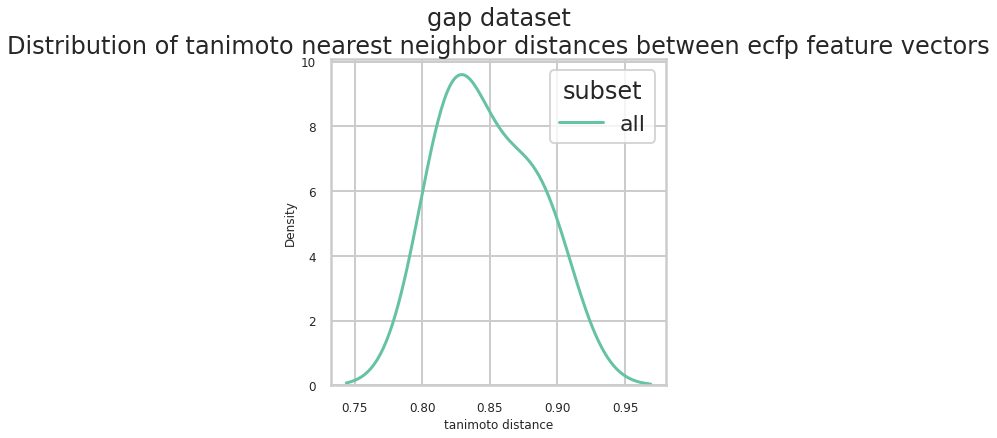

In [5]:
#used small dataset here
dp.plot_tani_dist_distr(kevin_data.head(), 'rdkit_smiles', 'gap') 

In [22]:
kevin_data["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(SMILES)) for SMILES in kevin_data["rdkit_smiles"]]

In [30]:
kevin_data.head()

Unnamed: 0  Unnamed: 0.1                  compound_id  \
0           0             0  MCKUTUAYYLJECU-UHFFFAOYSA-N   
1           1             1  MFGYUXHEJZRDAU-UHFFFAOYSA-N   
2           2             2  GQZQCROBCYNTMU-UHFFFAOYSA-N   
3           3             3  VXSOJAGKKDPBDJ-UHFFFAOYSA-N   
4           4             4  UXSNZYGTQTXRAD-UHFFFAOYSA-N   

                                              SMILES  HOMO_energy  \
0                              C#Cc1ccc(C#C)c2nsnc12    -6.062700   
1              O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21    -5.760653   
2                         O=C(NNCS(=O)(=O)O)c1ccncc1    -6.974282   
3  CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...    -5.164724   
4                                 CC(=O)c1ccc(Cl)nc1    -7.031426   

   LUMO_energy  HOMO_LUMO_gap  \
0    -2.745630       3.317070   
1    -2.704813       3.055840   
2    -1.039475       5.934807   
3    -0.897976       4.266748   
4    -1.948336       5.083090   

                                        rdkit_smiles  \
0                              C#Cc1ccc(C#C)c2nsnc12   
1              O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21   
2                         O=C(NNCS(=O)(=O)O)c1ccncc1   
3  CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...   
4                                 CC(=O)c1ccc(Cl)nc1   

                     inchi_key  VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  \
0  MCKUTUAYYLJECU-UHFFFAOYSA-N        3.317070            NaN       0.0   
1  MFGYUXHEJZRDAU-UHFFFAOYSA-N        3.055840            NaN       0.0   
2  GQZQCROBCYNTMU-UHFFFAOYSA-N        5.934807            NaN       0.0   
3  VXSOJAGKKDPBDJ-UHFFFAOYSA-N        4.266748            NaN       0.0   
4  UXSNZYGTQTXRAD-UHFFFAOYSA-N        5.083090            NaN       0.0   

   Remove_BadDuplicate      mol_wt  
0                    0  184.009519  
1                    0  320.007805  
2                    0  231.031377  
3                    0  405.155121  
4                    0  155.013791

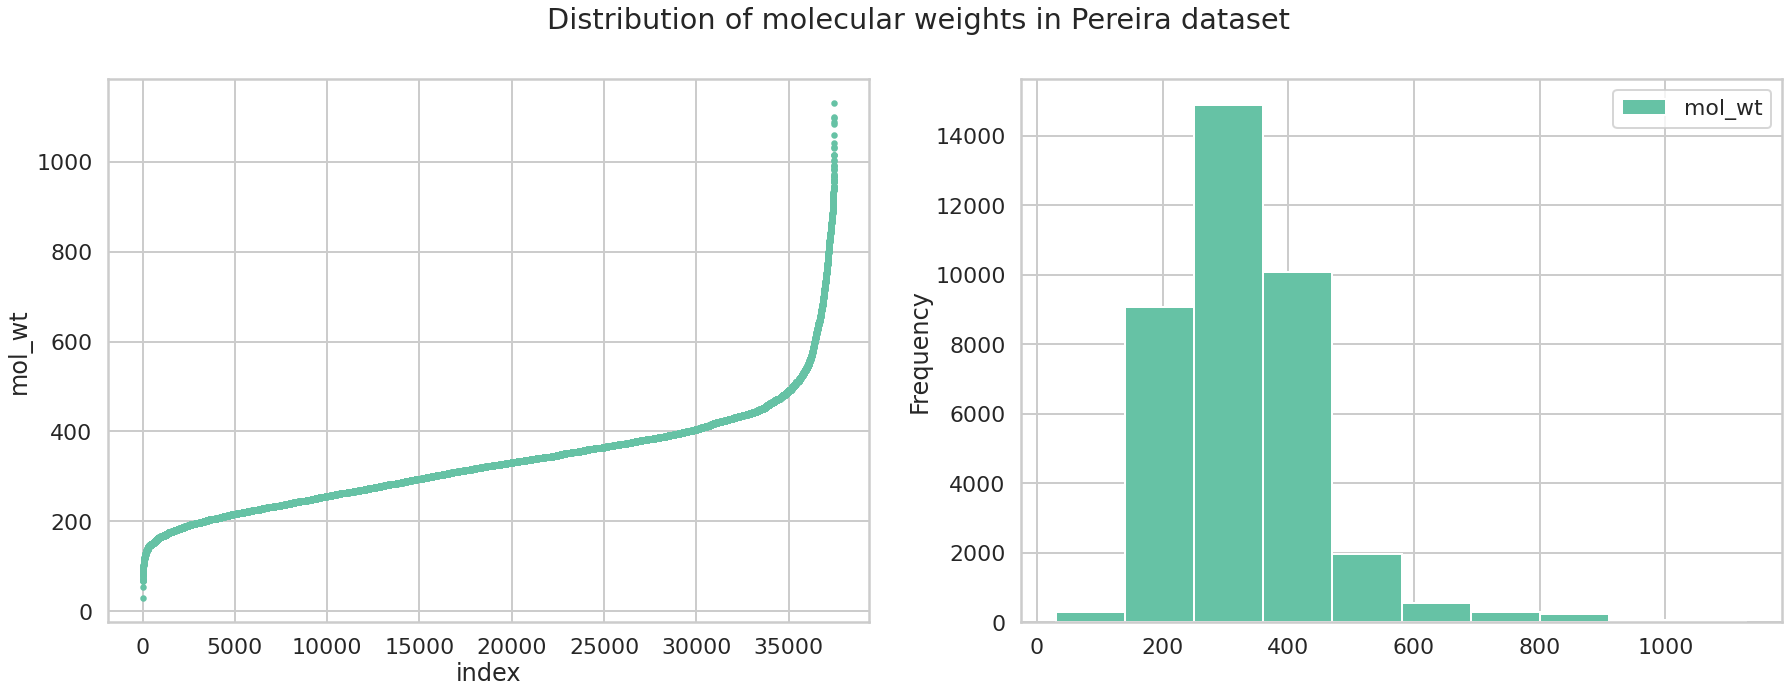

In [31]:
# visualize distribution of molecular weights
plot_qm9_df=kevin_data
plot_qm9_df=plot_qm9_df.sort_values(by='mol_wt')
plot_qm9_df=plot_qm9_df.reset_index(drop=True)
plot_qm9_df=plot_qm9_df.reset_index()

fig,ax=plt.subplots(1,2, figsize=(30,10))
plot_qm9_df.plot(kind='scatter', x='index', y='mol_wt', color = pal[0], ax=ax[0])
plot_qm9_df.plot(kind='hist', x="index", y="mol_wt", color = pal[0], ax=ax[1])
fig.suptitle("Distribution of molecular weights in Pereira dataset");

# QM9 Provided Dataset

In [6]:
qm9_data = pd.read_csv("select_qm9_data_curated-Copy1.csv")
qm9_data.head(8)
#qm9_data.shape

mol_id smiles    homo    lumo     gap rdkit_smiles  \
0  gdb_1      C -0.3877  0.1171  0.5048            C   
1  gdb_2      N -0.2570  0.0829  0.3399            N   
2  gdb_3      O -0.2928  0.0687  0.3615            O   
3  gdb_4    C#C -0.2845  0.0506  0.3351          C#C   
4  gdb_5    C#N -0.3604  0.0191  0.3796          C#N   
5  gdb_6    C=O -0.2670 -0.0406  0.2263          C=O   
6  gdb_7     CC -0.3385  0.1041  0.4426           CC   
7  gdb_8     CO -0.2653  0.0784  0.3437           CO   

                     inchi_key                  compound_id     mol_wt  \
0  VNWKTOKETHGBQD-UHFFFAOYSA-N  VNWKTOKETHGBQD-UHFFFAOYSA-N  16.031300   
1  QGZKDVFQNNGYKY-UHFFFAOYSA-N  QGZKDVFQNNGYKY-UHFFFAOYSA-N  17.026549   
2  XLYOFNOQVPJJNP-UHFFFAOYSA-N  XLYOFNOQVPJJNP-UHFFFAOYSA-N  18.010565   
3  HSFWRNGVRCDJHI-UHFFFAOYSA-N  HSFWRNGVRCDJHI-UHFFFAOYSA-N  26.015650   
4  LELOWRISYMNNSU-UHFFFAOYSA-N  LELOWRISYMNNSU-UHFFFAOYSA-N  27.010899   
5  WSFSSNUMVMOOMR-UHFFFAOYSA-N  WSFSSNUMVMOOMR-UHFFFAOYSA-N  30.010565   
6  OTMSDBZUPAUEDD-UHFFFAOYSA-N  OTMSDBZUPAUEDD-UHFFFAOYSA-N  30.046950   
7  OKKJLVBELUTLKV-UHFFFAOYSA-N  OKKJLVBELUTLKV-UHFFFAOYSA-N  32.026215   

   VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  
0          0.5048            NaN       0.0                    0  
1          0.3399            NaN       0.0                    0  
2          0.3615            NaN       0.0                    0  
3          0.3351            NaN       0.0                    0  
4          0.3796            NaN       0.0                    0  
5          0.2263            NaN       0.0                    0  
6          0.4426            NaN       0.0                    0  
7          0.3437            NaN       0.0                    0

In [4]:
# base_smiles_from_smiles:
# Generate a standardized SMILES, InChI keys for dataset with curation and structure modules.
# RDkit modules are used to process the SMILES strings

# Default Arg options: 
# useIsomericSmiles = True
# removeCharges = False 

qm9_data['rdkit_smiles'] = qm9_data['smiles'].apply(curate_data.base_smiles_from_smiles)

qm9_data['inchi_key'] = qm9_data['smiles'].apply(struct_utils.smiles_to_inchi_key)

[20:24:34] Can't kekulize mol.  Unkekulized atoms: 2 6
[20:24:34] Can't kekulize mol.  Unkekulized atoms: 3 5
[20:24:35] Can't kekulize mol.  Unkekulized atoms: 3 7
[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Proton(s) added/removed

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:26] WARNING: Omitted undefined stereo

[20:27:2

In [7]:
qm9_data.describe()

homo           lumo            gap         mol_wt  \
count  129435.000000  129435.000000  129435.000000  129435.000000   
mean       -0.240611       0.011973       0.252584     122.692994   
std         0.021780       0.047007       0.047279       7.570944   
min        -0.428600      -0.175000       0.024600      16.031300   
25%        -0.252800      -0.023200       0.217500     121.089149   
50%        -0.241400       0.013000       0.251500     125.047678   
75%        -0.229500       0.051500       0.289900     127.063329   
max        -0.101700       0.193500       0.622100     152.006069   

       VALUE_NUM_mean  VALUE_NUM_std      Perc_Var  Remove_BadDuplicate  
count   129435.000000   8.400000e+01  1.294350e+05             129435.0  
mean         0.252584   8.417938e-07  2.199227e-07                  0.0  
std          0.047279   7.715167e-06  7.912177e-05                  0.0  
min          0.024600   0.000000e+00  0.000000e+00                  0.0  
25%          0.217500   0.000000e+00  0.000000e+00                  0.0  
50%          0.251500   0.000000e+00  0.000000e+00                  0.0  
75%          0.289900   0.000000e+00  0.000000e+00                  0.0  
max          0.622100   7.071068e-05  2.846570e-02                  0.0

In [27]:
qm9_data_std = qm9_data
qm9_data_std['compound_id'] = qm9_data['inchi_key']
qm9_data_std.head(8)

mol_id smiles    homo    lumo     gap rdkit_smiles  \
0  gdb_1      C -0.3877  0.1171  0.5048            C   
1  gdb_2      N -0.2570  0.0829  0.3399            N   
2  gdb_3      O -0.2928  0.0687  0.3615            O   
3  gdb_4    C#C -0.2845  0.0506  0.3351          C#C   
4  gdb_5    C#N -0.3604  0.0191  0.3796          C#N   
5  gdb_6    C=O -0.2670 -0.0406  0.2263          C=O   
6  gdb_7     CC -0.3385  0.1041  0.4426           CC   
7  gdb_8     CO -0.2653  0.0784  0.3437           CO   

                     inchi_key                  compound_id     mol_wt  \
0  VNWKTOKETHGBQD-UHFFFAOYSA-N  VNWKTOKETHGBQD-UHFFFAOYSA-N  16.031300   
1  QGZKDVFQNNGYKY-UHFFFAOYSA-N  QGZKDVFQNNGYKY-UHFFFAOYSA-N  17.026549   
2  XLYOFNOQVPJJNP-UHFFFAOYSA-N  XLYOFNOQVPJJNP-UHFFFAOYSA-N  18.010565   
3  HSFWRNGVRCDJHI-UHFFFAOYSA-N  HSFWRNGVRCDJHI-UHFFFAOYSA-N  26.015650   
4  LELOWRISYMNNSU-UHFFFAOYSA-N  LELOWRISYMNNSU-UHFFFAOYSA-N  27.010899   
5  WSFSSNUMVMOOMR-UHFFFAOYSA-N  WSFSSNUMVMOOMR-UHFFFAOYSA-N  30.010565   
6  OTMSDBZUPAUEDD-UHFFFAOYSA-N  OTMSDBZUPAUEDD-UHFFFAOYSA-N  30.046950   
7  OKKJLVBELUTLKV-UHFFFAOYSA-N  OKKJLVBELUTLKV-UHFFFAOYSA-N  32.026215   

   VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  
0          0.5048            NaN       0.0                    0  
1          0.3399            NaN       0.0                    0  
2          0.3615            NaN       0.0                    0  
3          0.3351            NaN       0.0                    0  
4          0.3796            NaN       0.0                    0  
5          0.2263            NaN       0.0                    0  
6          0.4426            NaN       0.0                    0  
7          0.3437            NaN       0.0                    0

In [9]:
pd.DataFrame(qm9_data.gap	.value_counts()).T

0.2203  0.2228  0.2213  0.2208  0.2162  0.2215  0.2198  0.2193  0.2227  \
gap     156     155     152     149     146     140     140     139     139   

     0.2155  ...  0.0812  0.1021  0.1061  0.1063  0.1157  0.1230  0.1371  \
gap     137  ...       1       1       1       1       1       1       1   

     0.0955  0.1294  0.0823  
gap       1       1       1  

[1 rows x 2693 columns]

dist subset
0  1.00    all
1  1.00    all
2  1.00    all
3  0.75    all
4  0.75    all

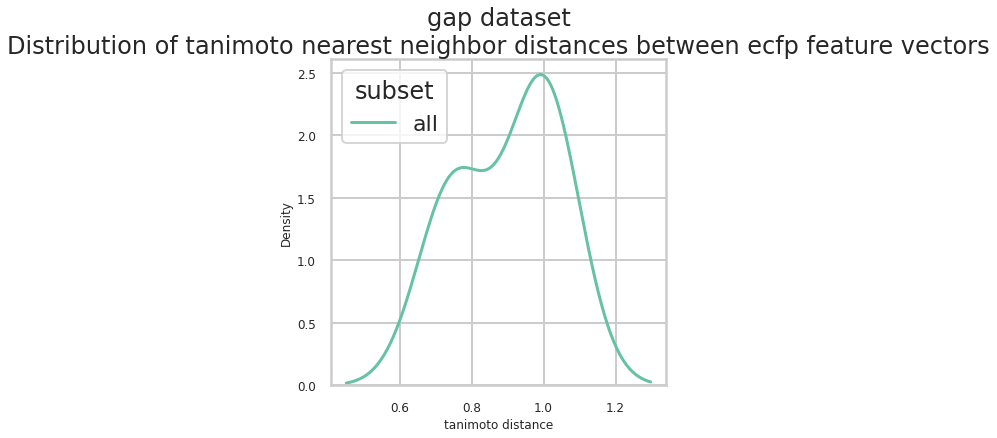

In [10]:
#used small dataset here
dp.plot_tani_dist_distr(qm9_data.head(), 'rdkit_smiles', 'gap') 

In [7]:
# column: Response values column
column = 'gap'

# tolerance: Percentage of individual respsonse values allowed to be different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100000

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# call the method `average_and_remove_duplicates` which changes the data and returns
# the new object as curated_df, in this case
 

qm9_curated_df = curate_data.average_and_remove_duplicates(column, 
                                                       tolerance, 
                                                       list_bad_duplicates, 
                                                       qm9_data, 
                                                       max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

KeyError: 'VALUE_NUM_mean'

In [30]:
curated_file = os.path.join('select_qm9_data_curated-Copy1.csv')
#qm9_curated_df.to_csv(curated_file, index=False)

In [ ]:
dp.diversity_plots(dset_key=curated_file,
                   datastore=False, 
                   id_col ='compound_id', 
                   smiles_col = 'rdkit_smiles', 
                   is_base_smiles=True, 
                   response_col = 'VALUE_NUM_mean')

Computing fingerprints...
Done
Computing Tanimoto distance matrix...


In [7]:
# manipulate data
import pandas as pd

# plot data
import numpy as np
import matplotlib.pyplot as plt

# curate data
import atomsci.ddm.utils.struct_utils as struct_utils
import atomsci.ddm.utils.curate_data as curate_data

# visualize compound structures
import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display

# visualize data
import seaborn as sns
sns.set_context('poster')
import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [10,10]

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))

In [32]:
qm9_data["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) for smile in qm9_data["rdkit_smiles"]]

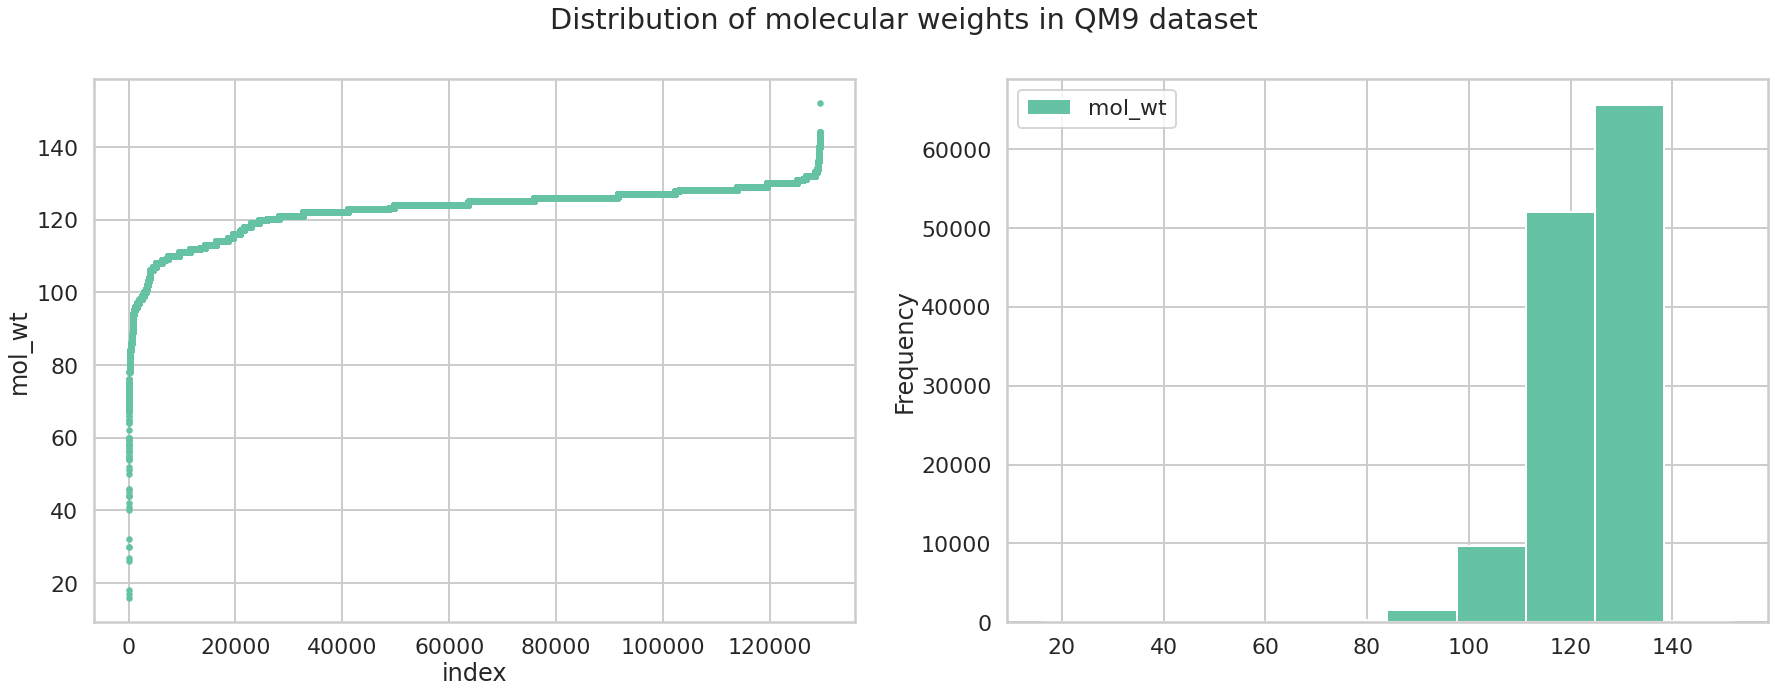

In [12]:
# visualize distribution of molecular weights
plot_qm9_df=qm9_data
plot_qm9_df=plot_qm9_df.sort_values(by='mol_wt')
plot_qm9_df=plot_qm9_df.reset_index(drop=True)
plot_qm9_df=plot_qm9_df.reset_index()

fig,ax=plt.subplots(1,2, figsize=(30,10))
plot_qm9_df.plot(kind='scatter', x='index', y='mol_wt', color = pal[0], ax=ax[0])
plot_qm9_df.plot(kind='hist', x="index", y="mol_wt", color = pal[0], ax=ax[1])
fig.suptitle("Distribution of molecular weights in QM9 dataset");

# QMUGS Dataset

In [8]:
qmug = pd.read_csv("final_QMUGS_curated.csv", index_col=0)
qmug.head(4)

chembl_id                                             smiles  \
Unnamed: 0                                                                    
0                CHEMBL1  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...   
3             CHEMBL1000  [H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...   
6            CHEMBL10000  [H]c1c([H])c(N([H])c2nc3c([H])c([H])c([H])c([H...   
9           CHEMBL100003  [H]O/C(OC([H])([H])[H])=C1\C(C([H])([H])[H])=N...   

                    mw  GFN2_HOMO_LUMO_GAP  DFT_HOMO_LUMO_GAP  \
Unnamed: 0                                                      
0           544.209718            0.044924           0.242930   
3           388.155370            0.115170           0.340824   
6           363.970876            0.106596           0.293095   
9           281.162708            0.080096           0.275410   

                                                 rdkit_smiles  \
Unnamed: 0                                                      
0           COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...   
3            O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1   
6                              O=c1oc(Nc2ccc(I)cc2)nc2ccccc12   
9                 CCC[C@@H]1C(C(=O)OCC)=C(C)N=C(C)/C1=C(\O)OC   

                              inchi_key                  compound_id  \
Unnamed: 0                                                             
0           GHBOEFUAGSHXPO-XZOTUCIWSA-N  GHBOEFUAGSHXPO-XZOTUCIWSA-N   
3           ZKLPARSLTMPFCP-NRFANRHFSA-N  ZKLPARSLTMPFCP-NRFANRHFSA-N   
6           KXLZEFPIBPQEAU-UHFFFAOYSA-N  KXLZEFPIBPQEAU-UHFFFAOYSA-N   
9           FCFUFMMLEUYHMD-CDZMIXDFSA-N  FCFUFMMLEUYHMD-CDZMIXDFSA-N   

            VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  
Unnamed: 0                                                                
0                 0.242102       0.000833  0.341925                    0  
3                 0.333456       0.006397  2.209649                    0  
6                 0.289124       0.003439  1.373521                    0  
9                 0.282891       0.007237  2.644696                    0

In [9]:
#make set smaller
qmug['mol_wt'] = qmug['mw']

In [10]:
qmug['rdkit_smiles'] = qmug['smiles'].apply(curate_data.base_smiles_from_smiles)
qmug['inchi_key'] = qmug['smiles'].apply(struct_utils.smiles_to_inchi_key)
qmug.head(4)

KeyboardInterrupt: 

In [36]:
qmug["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles)) for smiles in qmug["rdkit_smiles"]]

In [12]:
chembl_data_curated = qmug
chembl_data_curated.head()

chembl_id                                             smiles  \
Unnamed: 0                                                                    
0                CHEMBL1  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...   
3             CHEMBL1000  [H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...   
6            CHEMBL10000  [H]c1c([H])c(N([H])c2nc3c([H])c([H])c([H])c([H...   
9           CHEMBL100003  [H]O/C(OC([H])([H])[H])=C1\C(C([H])([H])[H])=N...   
12          CHEMBL100004  [H]O/C(OC([H])([H])C([H])([H])[H])=C1\C(C([H])...   

                    mw  GFN2_HOMO_LUMO_GAP  DFT_HOMO_LUMO_GAP  \
Unnamed: 0                                                      
0           544.209718            0.044924           0.242930   
3           388.155370            0.115170           0.340824   
6           363.970876            0.106596           0.293095   
9           281.162708            0.080096           0.275410   
12          375.150429            0.069851           0.272307   

                                                 rdkit_smiles  \
Unnamed: 0                                                      
0           COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...   
3            O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1   
6                              O=c1oc(Nc2ccc(I)cc2)nc2ccccc12   
9                 CCC[C@@H]1C(C(=O)OCC)=C(C)N=C(C)/C1=C(\O)OC   
12          CCO/C(O)=C1/C(C)=NC(C)=C(C(=O)OCCSc2ccccc2)[C@...   

                              inchi_key                  compound_id  \
Unnamed: 0                                                             
0           GHBOEFUAGSHXPO-XZOTUCIWSA-N  GHBOEFUAGSHXPO-XZOTUCIWSA-N   
3           ZKLPARSLTMPFCP-NRFANRHFSA-N  ZKLPARSLTMPFCP-NRFANRHFSA-N   
6           KXLZEFPIBPQEAU-UHFFFAOYSA-N  KXLZEFPIBPQEAU-UHFFFAOYSA-N   
9           FCFUFMMLEUYHMD-CDZMIXDFSA-N  FCFUFMMLEUYHMD-CDZMIXDFSA-N   
12          CUHAMGYOMBKPLA-BQOWYSNXSA-N  CUHAMGYOMBKPLA-BQOWYSNXSA-N   

            VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  \
Unnamed: 0                                                                 
0                 0.242102       0.000833  0.341925                    0   
3                 0.333456       0.006397  2.209649                    0   
6                 0.289124       0.003439  1.373521                    0   
9                 0.282891       0.007237  2.644696                    0   
12                0.272592       0.003115  0.104604                    0   

                mol_wt  
Unnamed: 0              
0           544.209718  
3           388.155370  
6           363.970876  
9           281.162708  
12          375.150429

In [15]:
import atomsci.ddm.utils.curate_data as curate_data, imp
import importlib as imp

In [39]:
qmug['Standard_Relation'] = True
qmug.head()

chembl_id  conf_id                                             smiles  \
0        CHEMBL1  conf_00  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...   
3     CHEMBL1000  conf_00  [H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...   
6    CHEMBL10000  conf_00  [H]c1c([H])c(N([H])c2nc3c([H])c([H])c([H])c([H...   
9   CHEMBL100003  conf_00  [H]O/C(OC([H])([H])[H])=C1\C(C([H])([H])[H])=N...   
12  CHEMBL100004  conf_00  [H]O/C(OC([H])([H])C([H])([H])[H])=C1\C(C([H])...   

            mw  atoms  heavy_atoms  heteroatoms  rotatable_bonds  \
0   544.209718     72           40            8                8   
3   388.155370     52           27            6                8   
6   363.970876     28           19            5                2   
9   281.162708     43           20            5               11   
12  375.150429     51           26            6               12   

    stereocenters  rings  hbond_acceptors  hbond_donors  \
0               4      7                8             0   
3               1      3                5             1   
6               0      3                4             1   
9               1      1                5             1   
12              1      2                6             1   

    significant_negative_wavenumbers  nonunique_smiles  GFN2_TOTAL_ENERGY  \
0                              False             False        -117.426790   
3                              False             False         -80.315048   
6                              False             False         -52.393036   
9                              False             False         -63.044635   
12                             False             False         -78.009245   

    GFN2_ATOMIC_ENERGY  GFN2_FORMATION_ENERGY  GFN2_TOTAL_ENTHALPY  \
0          -100.117788             -17.309002          -116.820431   
3           -68.493287             -11.821760           -79.870590   
6           -45.173987              -7.219049           -52.180530   
9           -53.625801              -9.418834           -62.664873   
12          -66.525705             -11.483539           -77.573112   

    GFN2_TOTAL_FREE_ENERGY  GFN2_DIPOLE_X  GFN2_DIPOLE_Y  GFN2_DIPOLE_Z  \
0              -116.920184         -2.618         -5.658         -3.467   
3               -79.950811          2.379         -3.195          4.509   
6               -52.241437         -1.362          0.292          0.020   
9               -62.740190         -4.793         -0.892          0.956   
12              -77.659095         -6.628          0.168          2.814   

    GFN2_DIPOLE_TOT  GFN2_QUADRUPOLE_XX  GFN2_QUADRUPOLE_XY  \
0             7.134               7.227               3.615   
3             6.017               5.337             -25.657   
6             1.394             -14.034             -36.284   
9             4.970              29.019               4.478   
12            7.203              13.223              -5.233   

    GFN2_QUADRUPOLE_YY  GFN2_QUADRUPOLE_XZ  GFN2_QUADRUPOLE_yz  \
0               11.107               3.188             -21.116   
3               -4.502              -1.798              11.798   
6                0.606              -4.581              -2.685   
9               -8.898             -11.014              -3.925   
12              -9.217              -3.183               3.113   

    GFN2_QUADRUPOLE_ZZ  GFN2_ROT_CONSTANT_A  GFN2_ROT_CONSTANT_B  \
0              -18.335             0.004667             0.001914   
3               -0.835             0.009034             0.002935   
6               13.428             0.027951             0.002706   
9              -20.121             0.017387             0.007241   
12              -4.005             0.012093             0.002612   

    GFN2_ROT_CONSTANT_C  GFN2_ENTHALPY_VIB  GFN2_ENTHALPY_ROT  \
0              0.001602          20783.593            888.752   
3              0.002678          14005.394            888.752   
6              0.002467           8093.824     

In [43]:
imp.reload(curate_data)

tolerance=10
column= 'DFT_HOMO_LUMO_GAP'; #'PIC50'
list_bad_duplicates='No'
max_std=1
list_bad_duplicates='Yes'
data=qmug
print("before",qmug.shape)

temp_df=curate_data.aggregate_assay_data(qmug, value_col=column, output_value_col=None,
                         label_actives=True,
                         active_thresh=100, # val > 6 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                         id_col='inchi_key', smiles_col='rdkit_smiles', relation_col='Standard_Relation') #set column =

# Remove inf in curated_df
temp_df = temp_df[~temp_df.isin([np.inf]).any(1)]
print("after",temp_df.shape)
temp_df.head()

before (160953, 76)


[15:54:09] Can't kekulize mol.  Unkekulized atoms: 3 5 27 28 29 31
[15:54:17] Can't kekulize mol.  Unkekulized atoms: 3 10
[15:54:56] Can't kekulize mol.  Unkekulized atoms: 3 9 10 13 14 17
[15:55:08] Can't kekulize mol.  Unkekulized atoms: 3 11 12 15 16 19


KeyboardInterrupt: 

In [16]:
qmug = qmug.rename(columns={"base_rdkit_smiles" : "rdkit_smiles","active" : "Activity_Binary_100_PDB"})

In [17]:
pd.DataFrame(qmug.Activity_Binary_100_PDB	.value_counts()).T

AttributeError: 'DataFrame' object has no attribute 'Activity_Binary_100_PDB'

chembl_data_curated["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) for smile in chembl_data_curated["rdkit_smiles"]]

In [ ]:
CHEMBL_curated_file = os.path.join('chembl_curated.csv')
chembl_data_curated.to_csv(CHEMBL_curated_file, index=False)

In [ ]:
dp.diversity_plots(dset_key=CHEMBL_curated_file,
                   datastore=False, 
                   id_col ='compound_id', 
                   smiles_col = 'rdkit_smiles', 
                   is_base_smiles=True, 
                   response_col = 'Activity_Binary_100_PDB')

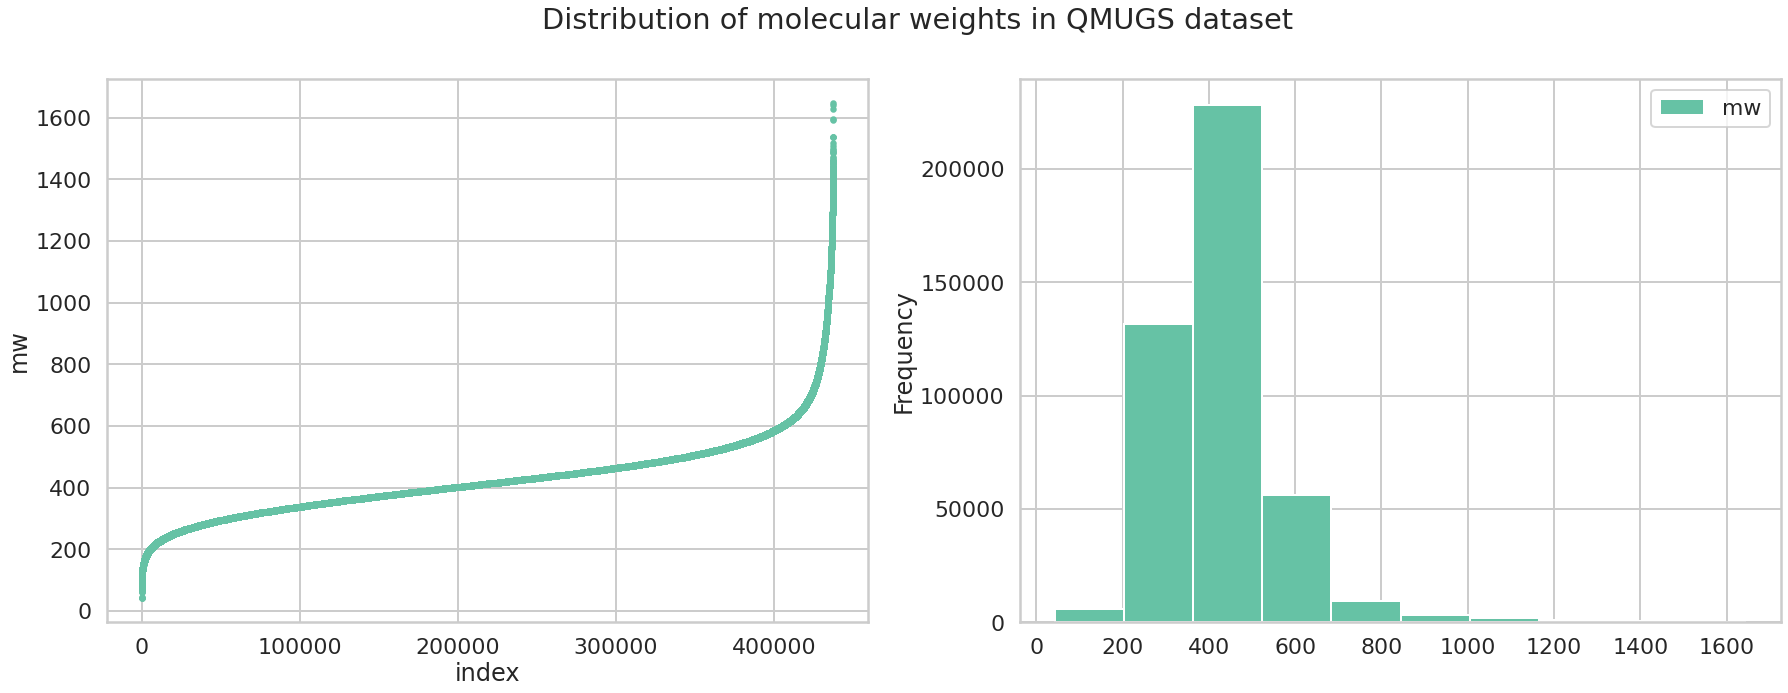

In [18]:
# visualize distribution of molecular weights
plot_chembl_df=chembl_data_curated
plot_chembl_df=plot_chembl_df.sort_values(by='mw')
plot_chembl_df=plot_chembl_df.reset_index(drop=True)
plot_chembl_df=plot_chembl_df.reset_index()

fig,ax=plt.subplots(1,2, figsize=(30,10))
plot_chembl_df.plot(kind='scatter', x='index', y='mw', color = pal[0], ax=ax[0])
plot_chembl_df.plot(kind='hist', x="index", y="mw", color = pal[0], ax=ax[1])
fig.suptitle("Distribution of molecular weights in QMUGS dataset");

In [19]:
dp.plot_tani_dist_distr(chembl_data_curated, 'rdkit_smiles', 'TDP1_dataset')

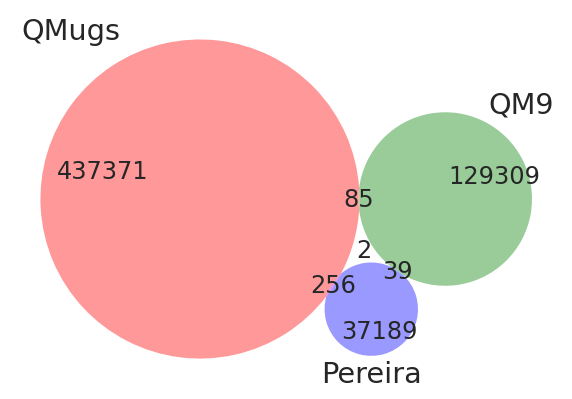

In [73]:
mpv.venn3([set(chembl_data_curated.rdkit_smiles),
           set(qm9_data.rdkit_smiles),
          set(kevin_data.rdkit_smiles)],
          set_labels = ['QMugs', 'QM9', 'Pereira']);

In [53]:
merge1 = pd.merge(chembl_data_curated, qm9_data, kevin_data, how="outer", on=("compound_id", "rdkit_smiles", 'mol_wt')# 'Activity_Binary_100_PDB'))
#print("Shape of merge1 dataframe:" merge1.shape)
#merge1.columns

SyntaxError: unexpected EOF while parsing (<ipython-input-53-5f36a92c2b14>, line 3)

In [62]:
merge1 = pd.merge(chembl_data_curated, qm9_data, how="outer", on=("compound_id", "rdkit_smiles", 'mol_wt'))

In [ ]:
print("\nMissing SMILES:", merge1['rdkit_smiles'].isna().sum())
print("Duplicate SMILES:", merge1['rdkit_smiles'].duplicated().sum())

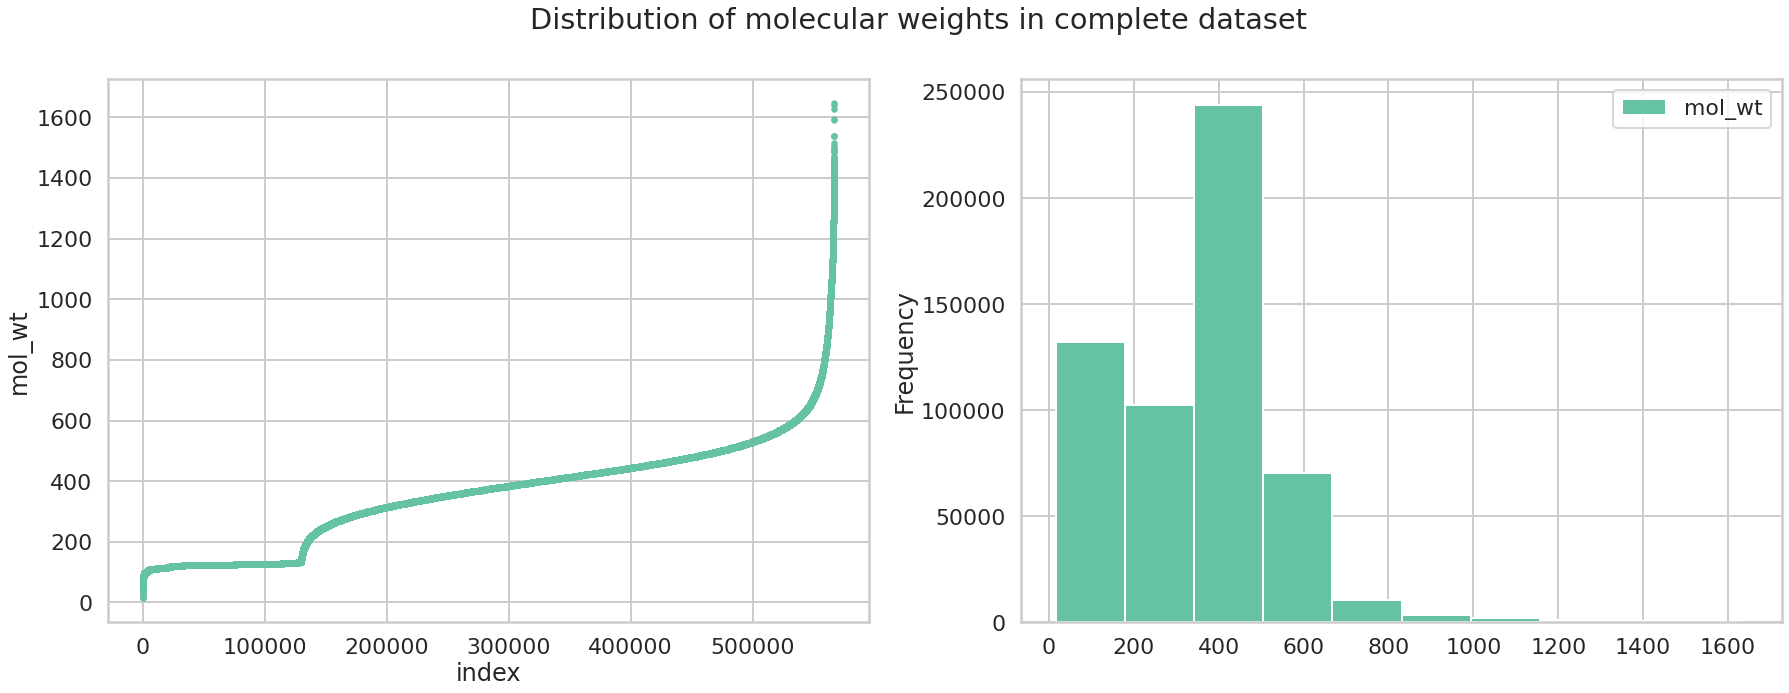

In [63]:
# visualize distribution of molecular weights
plot_merged_df=merge1
plot_merged_df=plot_merged_df.sort_values(by='mol_wt')
plot_merged_df=plot_merged_df.reset_index(drop=True)
plot_merged_df=plot_merged_df.reset_index()

fig,ax=plt.subplots(1,2, figsize=(30,10))
plot_merged_df.plot(kind='scatter', x='index', y='mol_wt', color = pal[0], ax=ax[0])
plot_merged_df.plot(kind='hist', x="index", y="mol_wt", color = pal[0], ax=ax[1])
fig.suptitle("Distribution of molecular weights in complete dataset");

In [64]:
dp.plot_tani_dist_distr(merge1, 'rdkit_smiles', 'TDP1_dataset')

In [ ]:
merged_curated_file = os.path.join('merged_curated.csv')
merge1.to_csv(merged_curated_file, index=False)

In [ ]:
dp.diversity_plots(dset_key=merged_curated_file,
                   datastore=False, 
                   id_col ='compound_id', 
                   smiles_col = 'rdkit_smiles', 
                   is_base_smiles=True, 
                   response_col = 'Activity_Binary_100_PDB')

[Text(0.5, 0, 'mol weight')]

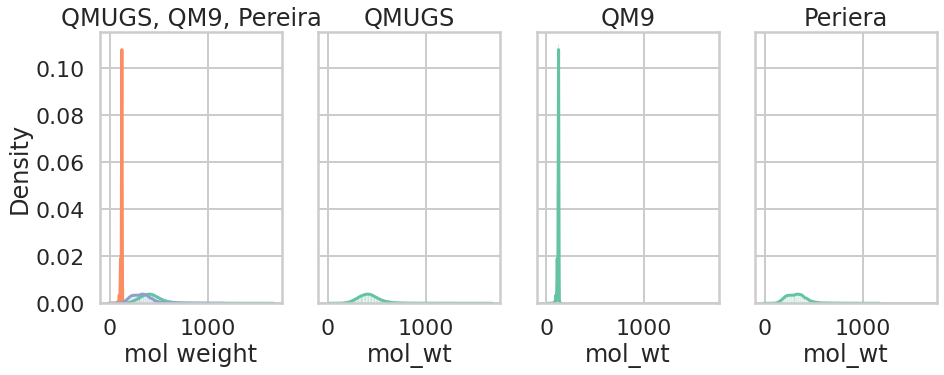

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)

sns.distplot(chembl_data_curated.mol_wt, ax=axes[0], kde = True)
sns.distplot(qm9_data.mol_wt, ax=axes[0], kde = True)
sns.distplot(kevin_data.mol_wt, ax=axes[0], kde = True);
axes[0].title.set_text('QMUGS, QM9, Pereira')
axes[0].set(xlabel="mol weight")

sns.distplot(chembl_data_curated.mol_wt, ax=axes[1])
axes[1].title.set_text('QMUGS')
axes[0].set(xlabel="mol weight")

sns.distplot(qm9_data.mol_wt, ax=axes[2]);
axes[2].title.set_text('QM9')
axes[0].set(xlabel="mol weight")

sns.distplot(kevin_data.mol_wt, ax=axes[3]);
axes[3].title.set_text('Periera')
axes[0].set(xlabel="mol weight")

In [47]:
kevin_data['Kevin'] = kevin_data['mol_wt']
qm9_data['QM9'] = qm9_data['mol_wt']
chembl_data_curated['QMUGS'] = chembl_data_curated['mol_wt']

In [52]:
qm9_data['QM9']

0          16.031300
1          17.026549
2          18.010565
3          26.015650
4          27.010899
             ...    
129430    121.052764
129431    121.052764
129432    120.068748
129433    119.073499
129434    121.052764
Name: QM9, Length: 129435, dtype: float64

In [49]:
bigdata = pd.DataFrame(kevin_data.Kevin, qm9_data.QM9)# chembl_data_curated.QMUGS)

In [50]:
bigdata.head()

Kevin
QM9             
16.031300    NaN
17.026549    NaN
18.010565    NaN
26.015650    NaN
27.010899    NaN

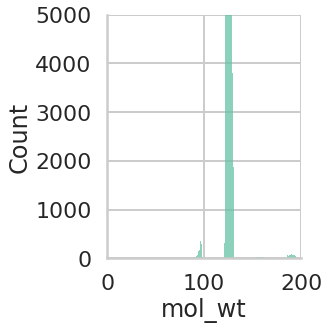

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#df1 = pd.DataFrame({'x': x, 'y1': 2 * x, 'type': 'a'})
#df2 = pd.DataFrame({'x': x, 'y2': 3 * x, 'type': 'b'}).rename(columns={'y2': 'y1'})

df1 = kevin_data
df2 = qm9_data

df = pd.concat([df1, df2], ignore_index=True)

# plot df
g = sns.displot(data=df, x='mol_wt') # hue='type', palette=['red', 'blue'])
g.set(ylim=(0, 5000))
g.set(xlim=(0, 200))

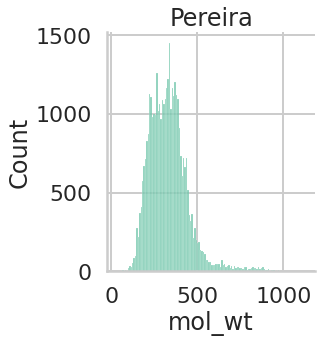

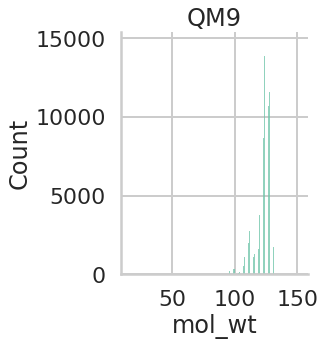

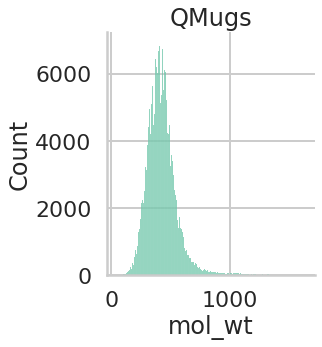

In [72]:
#kevin_data = sns.kevin_data('mol_wt')
x = sns.displot(kevin_data, x="mol_wt").set(title='Pereira')
y = sns.displot(qm9_data, x="mol_wt").set(title='QM9')
z = sns.displot(chembl_data_curated, x="mol_wt").set(title='QMugs');

KeyboardInterrupt: 

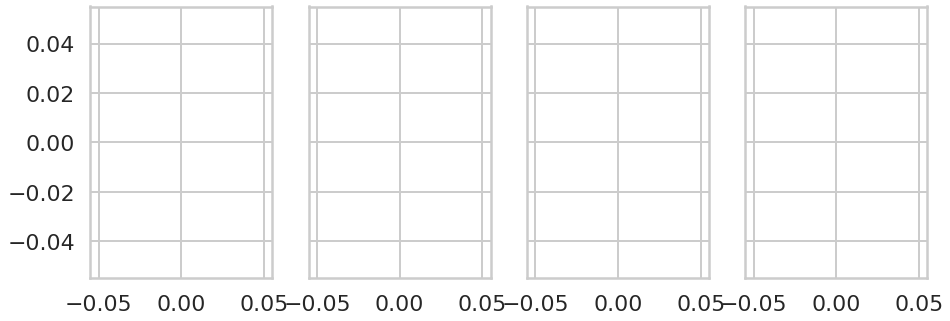

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)

sns.lineplot(chembl_data_curated.mol_wt, ax=axes[0])
sns.lineplot(qm9_data.mol_wt, ax=axes[0])
sns.lineplot(kevin_data.mol_wt, ax=axes[0]);
axes[0].title.set_text('QMUGS, QM9, Pereira')
axes[0].set(xlabel="mol weight")

sns.lineplot(chembl_data_curated.mol_wt, ax=axes[1])
axes[1].title.set_text('QMUGS')
axes[0].set(xlabel="mol weight")

sns.lineplot(qm9_data.mol_wt, ax=axes[2]);
axes[2].title.set_text('QM9')
axes[0].set(xlabel="mol weight")

sns.lineplot(kevin_data.mol_wt, ax=axes[3]);
axes[3].title.set_text('Periera')
axes[0].set(xlabel="mol weight")

In [ ]:
#chembl_data_curated.to_csv("chembl_curated.csv")
#TDP1_curated_df.to_csv("TDP1_curated_std.csv")
merge1.to_csv("chembl_TDP1_curated.csv")